In [35]:
import random
import string
from typing import TypedDict
from langgraph.graph import StateGraph, END
from langgraph.graph import StateGraph

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, ToolMessage
from langchain_ollama.chat_models import ChatOllama
from langchain_core.messages import HumanMessage
from tqdm import tqdm
import time, re

llm = ChatOllama(
    model="llama3.1:latest",
    temperature=0.0,
    base_url="http://localhost:11434",
    api_key="ollama"
)

In [36]:
from typing import Optional

class CounterState(TypedDict):
    number_counter: Optional[str] 
    random_letter: Optional[str]

In [37]:
cstate_1: CounterState = {
    "number_counter": 0,  # Start with 0, will be incremented to 1 on first run
    "random_letter": "x",
}
print(f"cstate_1: {cstate_1}")

cstate_1: {'number_counter': 0, 'random_letter': 'x'}


In [60]:
import random
import string

def increment_node(state):
    state['number_counter'] += 1
    state['random_letter'] = random.choice(string.ascii_letters)
    return state


In [61]:
def print_state(state):
    print(f"Current state: {state}")
    return state

In [51]:
print_state(cstate_1)

Current state: {'number_counter': 0, 'random_letter': 'x'}


In [70]:
def stop_condition(state):
    # Check if the number_counter is greater than 5
    counter = state.get('number_counter', 0)
    
    if counter > 5:
     
        return "end"
    else:
      
        return "continue"

In [63]:
from langgraph.graph import StateGraph
from langgraph.graph import END

# Create an instance of StateGraph with the GraphState structure
workflow = StateGraph(CounterState)
workflow

In [64]:
workflow.add_node("IncrementNode", increment_node)
workflow.add_node("PrintNode", print_state)     

In [65]:
workflow.add_edge("IncrementNode", "PrintNode")

In [66]:
workflow.add_conditional_edges("PrintNode", stop_condition, {"continue": "IncrementNode", "end": END})


In [67]:
workflow.set_entry_point("IncrementNode")
app = workflow.compile()

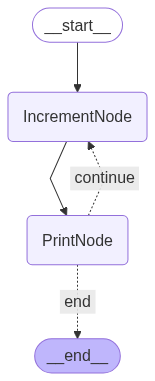

In [68]:
app

In [71]:
input_state = cstate_1
result = app.invoke(input_state)
print(result)

Current state: {'number_counter': 1, 'random_letter': 'u'}
Checking stop condition: counter = 1
Current state: {'number_counter': 2, 'random_letter': 'g'}
Checking stop condition: counter = 2
Current state: {'number_counter': 3, 'random_letter': 'R'}
Checking stop condition: counter = 3
Current state: {'number_counter': 4, 'random_letter': 'i'}
Checking stop condition: counter = 4
Current state: {'number_counter': 5, 'random_letter': 'd'}
Checking stop condition: counter = 5
Current state: {'number_counter': 6, 'random_letter': 'a'}
Checking stop condition: counter = 6
{'number_counter': 6, 'random_letter': 'a'}
